In [15]:
%load_ext autoreload
%autoreload 2
%cd ~/PonyPricer/
%matplotlib inline
%run scrape2sql.py

import re
import math
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import linear_model
from sklearn import isotonic
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from model import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/jbrosamer/PonyPricer
opening /Users/jbrosamer/PonyPricer/Batch/AllDressageAds.p
N Rows /Users/jbrosamer/PonyPricer/Batch/AllDressageAds.p 30420
opening /Users/jbrosamer/PonyPricer/Batch/AllEventingAds.p
N Rows /Users/jbrosamer/PonyPricer/Batch/AllEventingAds.p 306
opening /Users/jbrosamer/PonyPricer/Batch/AllHunterAds.p
N Rows /Users/jbrosamer/PonyPricer/Batch/AllHunterAds.p 765
opening /Users/jbrosamer/PonyPricer/Batch/AllJumpingAds.p
N Rows /Users/jbrosamer/PonyPricer/Batch/AllJumpingAds.p 3558
Total rows 35049 Line  66
Total rows 35049 Line  156
Total rows 35049 Line  109
Total rows 7818 Line  111
Total rows 7011 Line  113
Total rows 7003 Line  116
Total rows 7003 Line  122
Total rows 7003 Line  128
Total rows 7003 Line  158
{'color': 'VARCHAR(50)', 'price': 'REAL', 'id': 'INTEGER', 'warmblood': 'BOOLEAN', 'zip': 'VARCHAR(50)', 'breed': 'VARCHAR(50)', 'breedGroup': 'VARCHAR(50)', 'sold': '

df.columns Index([u'id', u'breed', u'price', u'color', u'age', u'zip', u'temp',
       u'warmblood', u'sold', u'soldhere', u'forsale', u'forlease',
       u'registered', u'skills', u'gender', u'inches', u'lnprice',
       u'breedGroup', u'dressage', u'hunter', u'jumper', u'eventing'],
      dtype='object')
Starting fit
Starting fit
Abs Median Error: 3868.46535307
Abs Percent Error: 0.49037858725
Mean RMSE: 10780.4009638
R2 0.223772498282
Line fit m:0.343123 b:5.888772


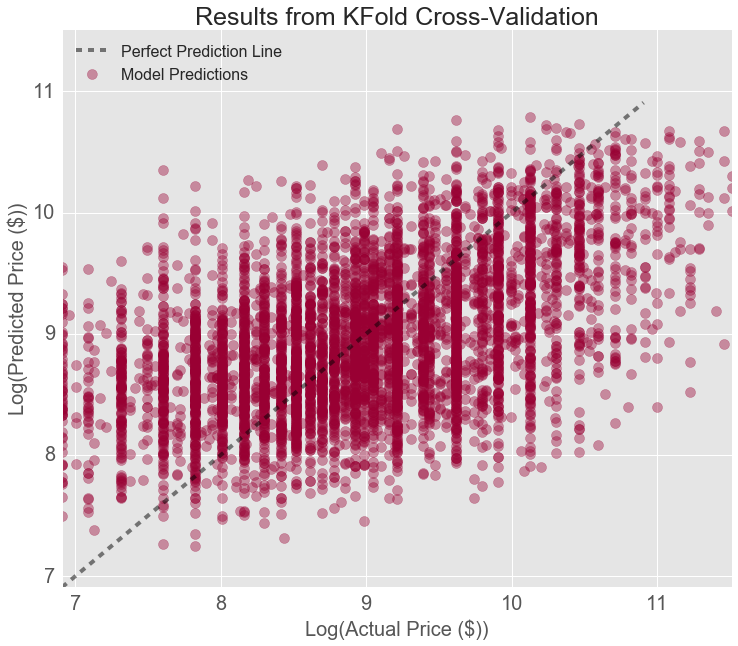

In [19]:
from model import *
df_test = all_data()
df = df_test.copy()
df = clean_col(df)
df = encode(df)

params_rand = {'n_estimators': 200, 'max_depth': None}
b = Model(df, params = params_rand)
b.split()
b.kfold_cv_rand(n_folds=2)
b.plot_results()
#df=b.cross_val_cols()


In [29]:
params = {}#'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1,
#'learning_rate': 0.01, 'loss': 'ls'}
b.params=params
b.kfold_cv()

Abs Median Error: 3523.91461979
Abs Percent Error: 0.464040915414
Mean RMSE: 10721.2712623
R2 0.332521837978


In [35]:
params={'n_estimators':500, }
b.params=params
b.kfold_cv()

Abs Median Error: 3497.71473867
Abs Percent Error: 0.462115155091
Mean RMSE: 10523.0935713
R2 0.335735308389


In [42]:
params={'n_estimators':500, 'max_depth': 2}
b.params=params
b.kfold_cv()

Abs Median Error: 3554.25958864
Abs Percent Error: 0.464984101423
Mean RMSE: 10564.6027887
R2 0.341647939886


In [43]:
params={'n_estimators':1000, 'max_depth': 2}
b.params=params
b.kfold_cv()

Abs Median Error: 3499.55730197
Abs Percent Error: 0.465316268685
Mean RMSE: 10456.4326443
R2 0.343540595095


In [54]:
params={'n_estimators':1000, 'max_depth': 2, 'min_samples_split':1 }
b.params=params
b.kfold_cv()

Abs Median Error: 3499.55730197
Abs Percent Error: 0.465316268685
Mean RMSE: 10455.9044622
R2 0.343618167273


In [58]:
for l in [1,2,3,5,7,10]:
    print "Leaf %i"%l
    params={'n_estimators':1000, 'max_depth': 2, 'min_samples_split':1,
 'min_samples_leaf':2 }
    b.params=params
    b.kfold_cv()

Leaf 1
Abs Median Error: 3499.55730197
Abs Percent Error: 0.465316268685
Mean RMSE: 10455.9263529
R2 0.343613666372
Leaf 2
Abs Median Error: 3495.85223028
Abs Percent Error: 0.463843146789
Mean RMSE: 10448.0426013
R2 0.345631236163
Leaf 3
Abs Median Error: 3518.48144912
Abs Percent Error: 0.463776212976
Mean RMSE: 10459.0166502
R2 0.343437737876
Leaf 5
Abs Median Error: 3508.05717965
Abs Percent Error: 0.46353947367
Mean RMSE: 10455.1982683
R2 0.344404413727
Leaf 7
Abs Median Error: 3503.13535239
Abs Percent Error: 0.464820889223
Mean RMSE: 10461.5691311
R2 0.344856801083
Leaf 10
Abs Median Error: 3519.0508564
Abs Percent Error: 0.465631019203
Mean RMSE: 10463.0248738
R2 0.345167731279


Feature ranking:
1. feature 4 (0.412393)
2. feature 0 (0.242278)
3. feature 2 (0.200090)
4. feature 3 (0.082563)
5. feature 1 (0.062677)
6. feature 8 (0.000000)
7. feature 7 (0.000000)
8. feature 6 (0.000000)
9. feature 5 (0.000000)


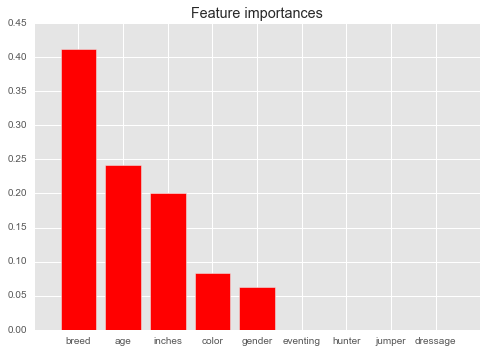

In [4]:
gbr=b.makeModel()
b.plotFeatures()

features [4 0 2 3 1 8 7 6]
FeatureNames ['age', 'gender', 'inches', 'color', 'breed', 'dressage', 'jumper', 'hunter', 'eventing', 'lnprice']
________________________________________________________________________________
Custom 3d plot via ``partial_dependence``



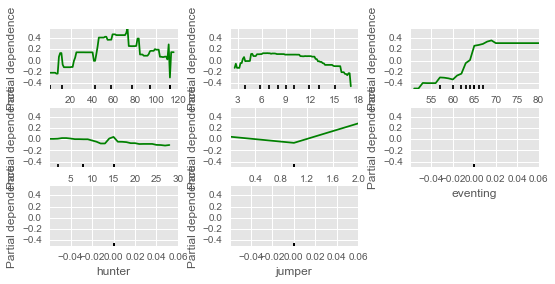

In [5]:
b.plotPartial(8)


In [6]:

features=['breedGroup', 'gender']
medians=list()
means=list()
for f in features:
    gpBy=pf.groupby(pf[f])['diff'].median()
    print gpBy

NameError: name 'pf' is not defined

In [ ]:
plt.style.use('ggplot')
df = df_test.copy()
df = clean_col(df)
idx = df.loc[df['price']>100000,:].index
#df = df.drop(idx, axis = 0)
df_temp = df[['age','inches', 'gender', 'lnprice']]
plot = sns.pairplot(df_temp, hue = 'gender', diag_kind='kde')
for ax in plot.axes.flat:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, horizontalalignment='right')